# **Oasis Infobyte - Data Science Internship**

# **TASK 1 - UNEMPLOYMENT ANALYSIS WITH PYTHON**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

#### Dataset link :- https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india?select=Unemployment_Rate_upto_11_2020.csv

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading & Understanding the dataset

In [2]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
data.shape

(267, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

There are no null values in the dataset.

In [7]:
data_new = data.rename(columns={data.columns[0]:'State',data.columns[3]:'EUR',data.columns[4]:'EE', data.columns[5]:'ELPR', data.columns[6]:'Region'})
data_new.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Data Visualisation and Analysis

In [8]:
data_new.groupby("Region").size()

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

<ipython-input-9-2d7ecaa6e7d7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-9-2d7ecaa6e7d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_new.corr(), annot=True)


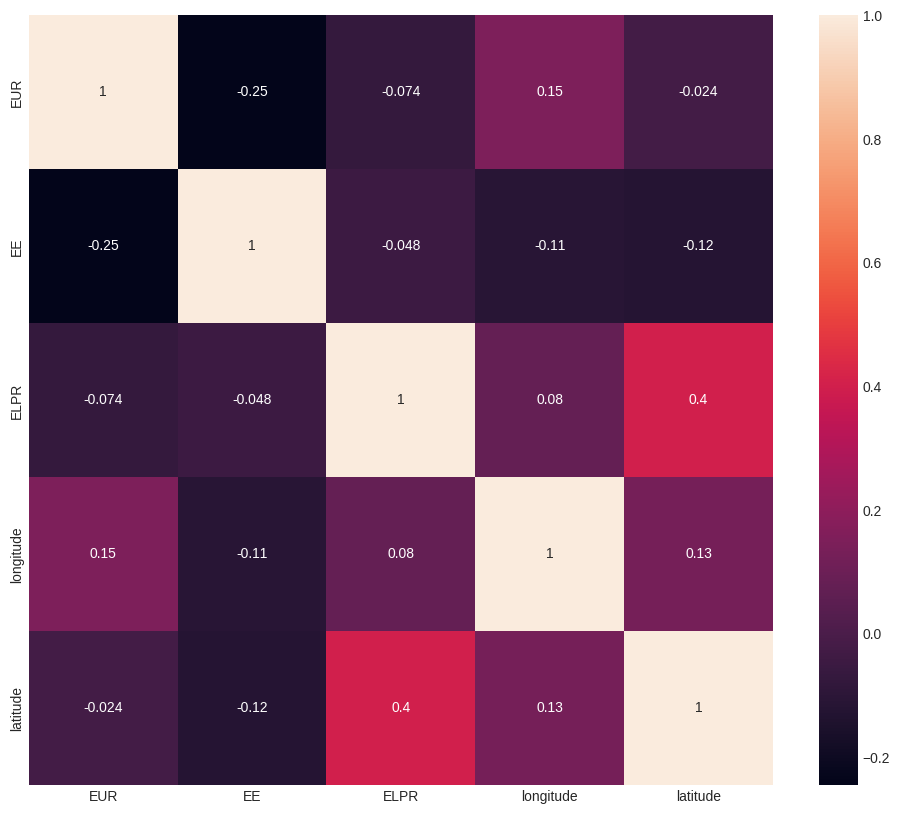

In [9]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data_new.corr(), annot=True)
plt.show()

### Overall Unemployment

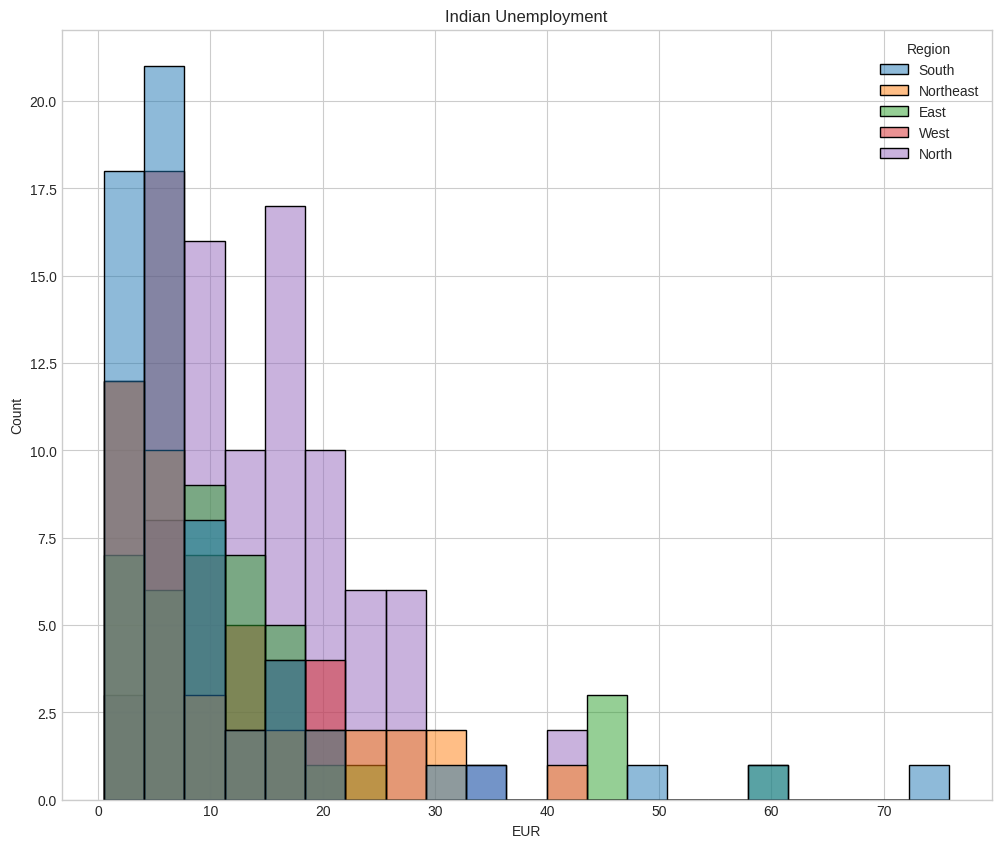

In [10]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="EUR", hue="Region", data=data_new)
plt.show()

In [11]:
unemploment = data_new[["State", "Region", "EUR"]]
figure = px.sunburst(unemploment, path=["Region", "State"],
                     values="EUR",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

### Region wise Unemployment

In [12]:
fg = px.scatter(data_new,x='Region',y='EUR',color='Region',title='Unemployment Rate (Region wise) by Scatter Plot',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [13]:
region = data_new.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### State wise Unemployment

In [14]:
state_wise = data_new.groupby(["State"])[['EUR', "EE", "ELPR"]].mean()
state_wise = pd.DataFrame(state_wise).reset_index()

fig = px.bar(state_wise, x="State", y="EUR", color="State", title="Average Unemployment Rate by States")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Conclusion :
1. Most Unemployed State in India : Haryana
2. Most Unemployed Region in India : North
3. Least Unemployed State in India : Meghalaya
4. Least Unemployed Region in India : West

# **--------------------------------------------Thank You--------------------------------------------**